In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd
import math, datetime
from scipy.stats import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
# from sklearn import cross_validation
from sklearn.linear_model import LinearRegression, BayesianRidge, ARDRegression

In [3]:
# Read the csv file into a pandas DataFrame
unemployment = pd.read_csv('../../Clean Data/pandas_cleaned/unemployment_rate_clean.csv')
unemployment.head()

,Unnamed: 0,Period,Unemployment(%)
0,0,1948Q1,3.3
1,1,1948Q2,3.3
2,2,1948Q3,3.3
3,3,1948Q4,3.4
4,4,1949Q1,4.1


In [4]:
unemployment = unemployment.drop(columns = ["Unnamed: 0"])

In [5]:
unemployment = unemployment.rename(columns = {
    "Period" : "Period",
    "Unemployment(%)" : "unemployment_rate",
})

In [6]:
unemployment.head(10)

,Period,unemployment_rate
0,1948Q1,3.3
1,1948Q2,3.3
2,1948Q3,3.3
3,1948Q4,3.4
4,1949Q1,4.1
5,1949Q2,5.3
6,1949Q3,6.1
7,1949Q4,6.4
8,1950Q1,5.8
9,1950Q2,5.1


In [7]:
unemployment['date'] = pd.to_datetime([
    '-'.join(x.split()[::-1]) for x in unemployment['Period']])

# datetime.date(2002, 12,4).strftime("%Y%m%d")
# '20021204'


# from datetime import datetime
# unemployment['date'] = unemployment["date"].astype(int)
# datetime_list = []
# for i in range (len(unemployment['date'])):
#     unemployment.append(datetime.strftime(unemployment['date'][i],'%Y%m%d'))


# from datetime import datetime
# unemployment['date'] = unemployment['date'].astype(int)
# datetime_list = []
# for i in range(len(unemployment)):
#     unemployment.append(datetime.strptime(unemployment['date'][i],'%m/%d/%Y'))

In [8]:
unemployment.head()

,Period,unemployment_rate,date
0,1948Q1,3.3,1948-01-01
1,1948Q2,3.3,1948-04-01
2,1948Q3,3.3,1948-07-01
3,1948Q4,3.4,1948-10-01
4,1949Q1,4.1,1949-01-01


In [9]:
unemployment = unemployment.rename(columns = {
    "date" : "date",
    "unemployment_rate" : "unemployment_rate",
    "Period" : "drop_me",
})

In [29]:
unemployment = unemployment.drop(columns = {"drop_me"})

In [32]:
unemployment.head(10)

,unemployment_rate,date
0,3.3,1948-01-01
1,3.3,1948-04-01
2,3.3,1948-07-01
3,3.4,1948-10-01
4,4.1,1949-01-01
5,5.3,1949-04-01
6,6.1,1949-07-01
7,6.4,1949-10-01
8,5.8,1950-01-01
9,5.1,1950-04-01


In [31]:
unemployment.to_csv("unemployment_rate_model_data.csv")

In [10]:
unemployment.dtypes

drop_me                      object
unemployment_rate           float64
date                 datetime64[ns]
dtype: object

In [11]:
X = unemployment.date.values.reshape(-1, 1)
y = unemployment.unemployment_rate.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (289, 1) (289, 1)


C:\Users\stroh\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Unemployment Rate')

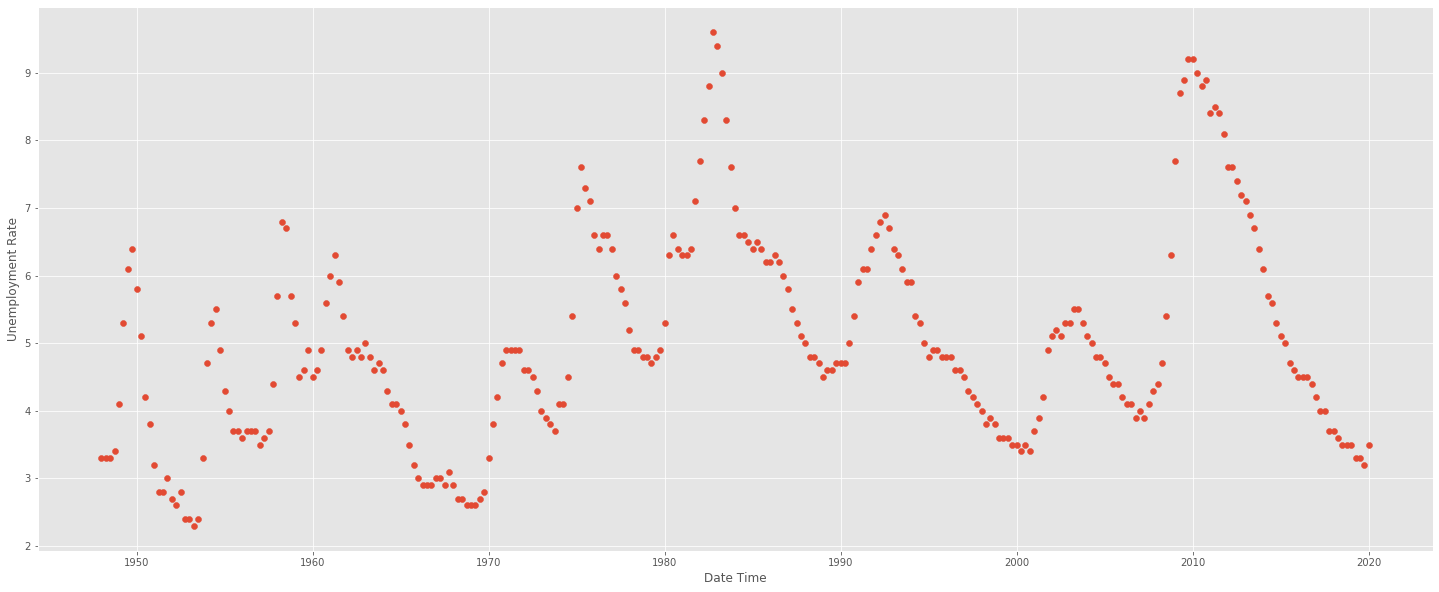

In [12]:
from matplotlib.pyplot import figure
figure (figsize = (25, 10))
plt.scatter(X, y)
plt.xlabel("Date Time")
plt.ylabel("Unemployment Rate")

In [13]:
df = unemployment[["unemployment_rate", "date"]]

In [14]:
forecast_col = "unemployment_rate"

In [15]:
forecast_out = int(math.ceil(0.01*len(df)))

In [16]:
df["label"] = df[forecast_col].shift(-forecast_out)

In [17]:
print(df.count())

unemployment_rate    289
date                 289
label                286
dtype: int64


In [18]:
# COULDN'T GET IT TO ACCEPT DATE IN ANOTHER WAY AND DIDN'T WANT IT TO REALLY, JUST WANTED IT TO

X = np.array(df.drop(["label", "date"],1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

In [19]:
df.dropna(inplace = True)
y = np.array(df["label"])
y = np.array(df["label"])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
clf = svm.SVR("poly", degree =1)
clf.fit(X_train, y_train)

C:\Users\stroh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=1, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
accuracy = clf.score(X_test, y_test)

In [23]:
# what is exciting is I believe forecast out's units is in quarters so this could predict almost a year out ideally

print(accuracy)
print (f"Forecast out is = {forecast_out}")

0.6328986709831976
Forecast out is = 3


In [24]:
forecast_set = clf.predict(X_lately)

In [25]:
print(forecast_set, accuracy, forecast_out)

[3.4333333  3.4333333  3.25555549] 0.6328986709831976 3


In [26]:
df["Forecast"] = np.nan

In [27]:
last_quarter = df.iloc[-1].name
last_unix = last_quarter.timestamp()
one_quarter = 3*(2628000)
next_unix = last_unix + one_quarter

AttributeError: 'numpy.int64' object has no attribute 'timestamp'